#### Week3 
#### Visualizing Open mHealth Full JSON Raw Data Using Python

The Open mHealth documentation (https://www.openmhealth.org/documentation/#/visualize-data/visualization-library) provides an example [dataset](https://gist.githubusercontent.com/jasperSpeicher/3a6af8226182880d75d2/raw/1yr.json) in JSON format. This dataset represents a single individual’s health data collected over the course of one year, and includes multiple data schemas, such as blood pressure, heart rate, and physical activity.

In the official Open mHealth demo, the data is visualized using JavaScript with libraries like D3.js and Plottable.js. In this project, we have replaced the visualization pipeline in Python, using pandas for data handling and matplotlib for static chart generation.

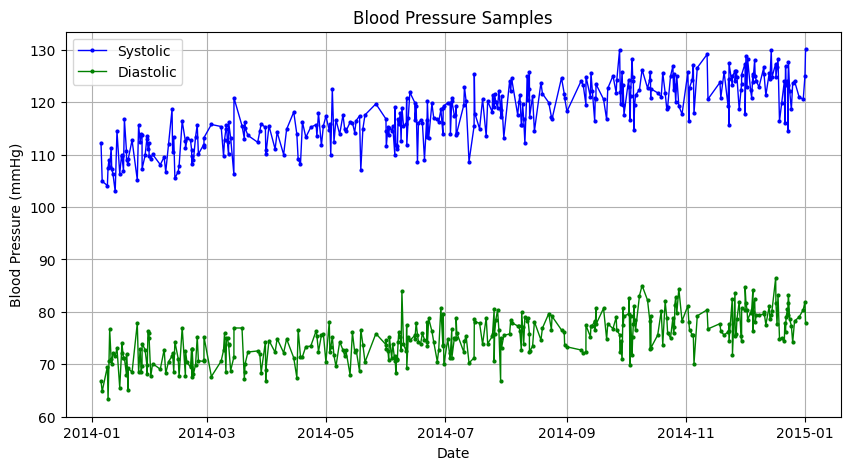

,timestamp,systolic,diastolic
0,2014-01-05 17:53:28+00:00,112.277048,66.792758
1,2014-01-06 08:36:09+00:00,104.907342,64.857681
2,2014-01-09 00:11:22+00:00,104.093981,69.558922
3,2014-01-09 08:30:31+00:00,107.517093,63.335964
4,2014-01-09 20:13:25+00:00,109.045218,70.663780
...,...,...,...
345,2014-12-26 16:44:26+00:00,124.031897,78.233341
346,2014-12-29 01:20:20+00:00,120.969321,79.019957
347,2014-12-31 03:45:41+00:00,120.549620,80.393243
348,2015-01-01 00:50:58+00:00,124.988877,81.918553


In [82]:
# 1. plot blood-pressure
# the dataset has systolic and diastolic bp samples

import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display


# Load JSON data from local
with open('./1yr.json', 'r') as file:
    data = json.load(file)


records_bp = []

for entry in data:
    try:
        timestamp = entry["body"]["effective_time_frame"]["date_time"]
        systolic = entry["body"]["systolic_blood_pressure"]["value"]
        diastolic = entry["body"]["diastolic_blood_pressure"]["value"]
        records_bp.append({
            "timestamp": datetime.fromisoformat(timestamp.replace("Z", "+00:00")),
            "systolic": systolic,
            "diastolic": diastolic
        })
    except KeyError:
        continue



df_bp = pd.DataFrame(records_bp)
df_bp.sort_values("timestamp", inplace=True)
df_bp.reset_index(drop=True, inplace=True)

# Plot systolic and diastolic samples
plt.figure(figsize=(10, 5))

plt.plot(df_bp["timestamp"], df_bp["systolic"], label="Systolic", color='blue', marker='o', markersize=2, linewidth=1)
plt.plot(df_bp["timestamp"], df_bp["diastolic"], label="Diastolic", color='green', marker='o', markersize=2, linewidth=1)


plt.xlabel("Date")
plt.ylabel("Blood Pressure (mmHg)")
plt.title("Blood Pressure Samples")
plt.legend()
plt.grid(True)
plt.show()


# Display table of data
display(df_bp)

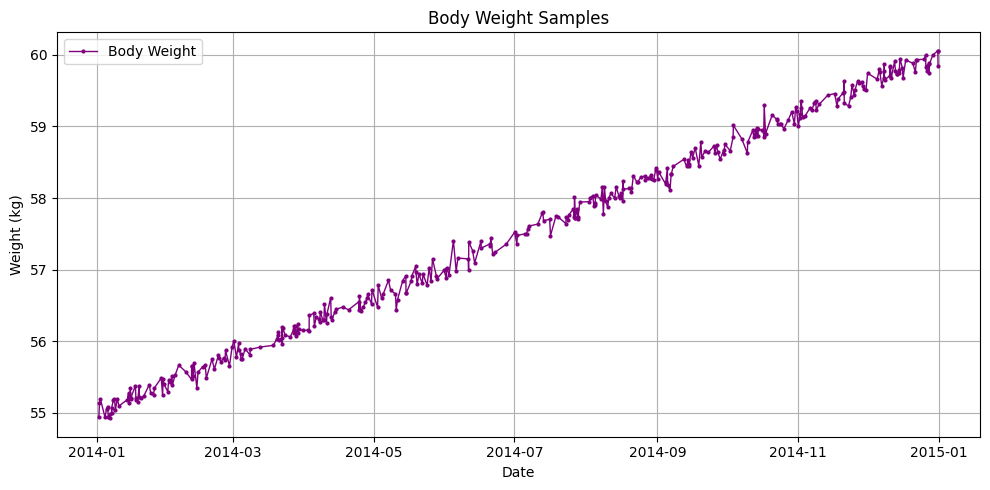

,timestamp,weight
0,2014-01-01 23:37:37+00:00,54.946776
1,2014-01-02 06:02:17+00:00,55.134865
2,2014-01-02 14:32:07+00:00,55.201210
3,2014-01-04 15:11:02+00:00,54.940435
4,2014-01-05 07:37:04+00:00,55.056638
...,...,...
373,2014-12-27 20:16:45+00:00,59.867645
374,2014-12-29 06:28:09+00:00,59.992867
375,2014-12-31 11:05:41+00:00,60.056310
376,2014-12-31 12:32:29+00:00,60.053955


In [83]:
# 2. Extract body weight records
records_bw = []

for entry in data:
    try:
        timestamp = entry["body"]["effective_time_frame"]["date_time"]
        weight = entry["body"]["body_weight"]["value"]
        records_bw.append({
            "timestamp": datetime.fromisoformat(timestamp.replace("Z", "+00:00")),
            "weight": weight
        })
    except KeyError:
        continue

# Create DataFrame
df_bw = pd.DataFrame(records_bw)
df_bw.sort_values("timestamp", inplace=True)
df_bw.reset_index(drop=True, inplace=True)

# Plot weight samples
plt.figure(figsize=(10, 5))
plt.plot(df_bw["timestamp"], df_bw["weight"], label="Body Weight", color='purple', marker='o', markersize=2, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Weight (kg)")
plt.title("Body Weight Samples")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the table
display(df_bw)

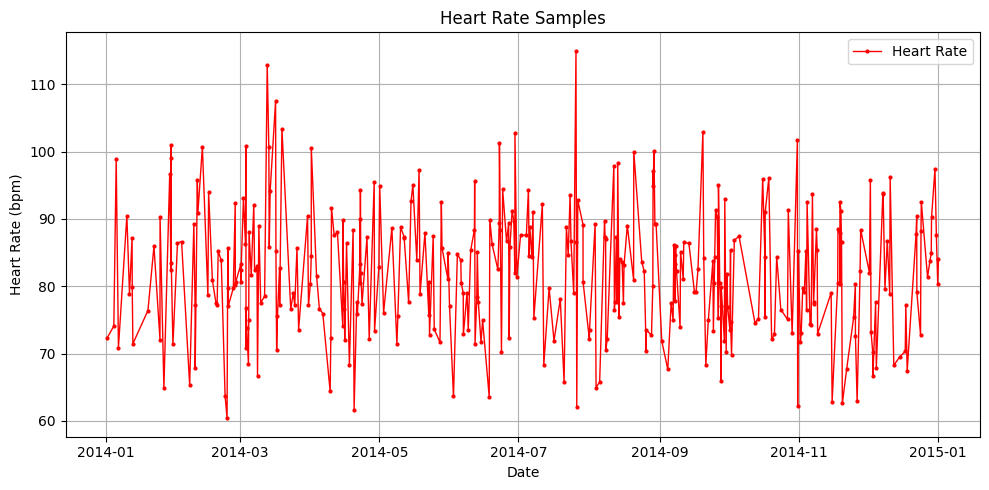

,timestamp,heart_rate
0,2014-01-01 17:40:19+00:00,72.378853
1,2014-01-04 14:02:28+00:00,74.090176
2,2014-01-05 14:59:50+00:00,98.852132
3,2014-01-06 14:33:11+00:00,70.875587
4,2014-01-10 07:15:50+00:00,90.468295
...,...,...
358,2014-12-29 04:42:52+00:00,90.234015
359,2014-12-30 16:50:06+00:00,97.422143
360,2014-12-31 07:26:16+00:00,87.591769
361,2014-12-31 21:44:50+00:00,80.304596


In [84]:
# 3. Extract heart rate records

records_hr = []

for entry in data:
    try:
        timestamp = entry["body"]["effective_time_frame"]["date_time"]
        heart_rate = entry["body"]["heart_rate"]["value"]
        records_hr.append({
            "timestamp": datetime.fromisoformat(timestamp.replace("Z", "+00:00")),
            "heart_rate": heart_rate
        })
    except KeyError:
        continue

# Create DataFrame
df_hr = pd.DataFrame(records_hr)
df_hr.sort_values("timestamp", inplace=True)
df_hr.reset_index(drop=True, inplace=True)

# Plot heart rate samples
plt.figure(figsize=(10, 5))
plt.plot(df_hr["timestamp"], df_hr["heart_rate"], label="Heart Rate", color='red', marker='o', markersize=2, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Heart Rate (bpm)")
plt.title("Heart Rate Samples")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the table
display(df_hr)

/var/folders/v0/nml3xxcd7d58_7c9ryxw1p9w0000gn/T/ipykernel_53388/1790625948.py:39: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_total.index = monthly_total.index.to_period("M")


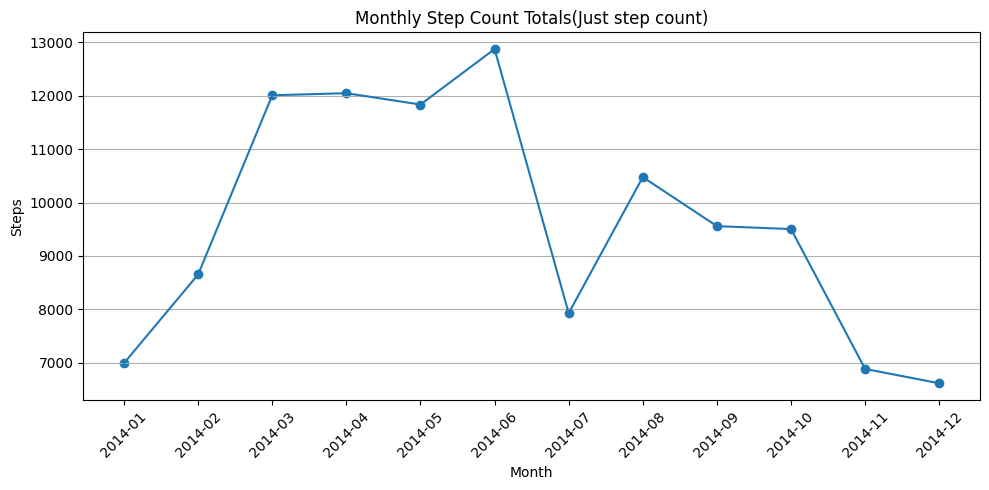

,step_count
timestamp,
2014-01,6995.579271
2014-02,8654.849403
2014-03,12007.571524
2014-04,12046.363294
2014-05,11834.323449
2014-06,12872.768645
2014-07,7930.391414
2014-08,10476.160261
2014-09,9558.701422


In [85]:
# 4. Monthly Step Count Totals(Just step count)
# The orginal demo calulate the step sum of every month. 
# We will follow the demo

records_sc = []

for entry in data:
    try:
        if entry["header"]["schema_id"]["name"] != "step-count":
            continue

        tf = entry["body"]["effective_time_frame"]
        if "date_time" in tf:
            timestamp = tf["date_time"]
        elif "time_interval" in tf:
            timestamp = tf["time_interval"]["start_date_time"]
        else:
            continue

        step_field = entry["body"]["step_count"]
        steps = step_field["value"] if isinstance(step_field, dict) else step_field

        records_sc.append({
            "timestamp": datetime.fromisoformat(timestamp.replace("Z", "+00:00")),
            "step_count": steps
        })
    except Exception as e:
        print(f"Skipping record due to error: {e}")
        continue

# Convert to DataFrame
df_sc = pd.DataFrame(records_sc)
df_sc.sort_values("timestamp", inplace=True)
df_sc.reset_index(drop=True, inplace=True)

# Group by month
df_sc.set_index("timestamp", inplace=True)
monthly_total = df_sc.resample("ME").sum()
monthly_total.index = monthly_total.index.to_period("M")

# Plot
plt.figure(figsize=(10, 5))

plt.plot(monthly_total.index.astype(str), monthly_total["step_count"])
plt.scatter(monthly_total.index.astype(str), monthly_total["step_count"])

plt.xlabel("Month")
plt.ylabel("Steps")
plt.title("Monthly Step Count Totals(Just step count)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

display(monthly_total)

/var/folders/v0/nml3xxcd7d58_7c9ryxw1p9w0000gn/T/ipykernel_53388/2118702067.py:39: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_distance.index = monthly_distance.index.to_period("M")


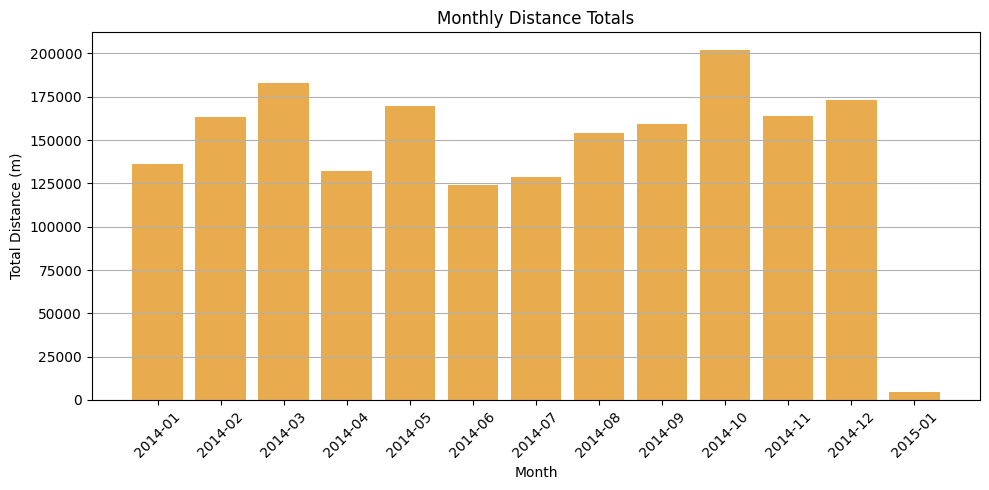

,distance
timestamp,
2014-01,136438.498463
2014-02,163245.008636
2014-03,182755.175758
2014-04,131966.048508
2014-05,169565.223996
2014-06,124108.949375
2014-07,128496.443934
2014-08,154254.948127
2014-09,159460.853381


In [86]:
# 5. Distance
# The orginal demo calulate the distance sum of every month. 
# We will follow the demo and use bar.


records_distance = []

for entry in data:
    try:
        if entry["header"]["schema_id"]["name"] != "physical-activity":
            continue

        tf = entry["body"]["effective_time_frame"]
        if "date_time" in tf:
            timestamp = tf["date_time"]
        elif "time_interval" in tf:
            timestamp = tf["time_interval"]["start_date_time"]
        else:
            continue

        dist_field = entry["body"]["distance"]
        distance = dist_field["value"] if isinstance(dist_field, dict) else dist_field

        records_distance.append({
            "timestamp": datetime.fromisoformat(timestamp.replace("Z", "+00:00")),
            "distance": distance
        })
    except Exception as e:
        print(f"Skipping record due to error: {e}")
        continue

# Create DataFrame
df_dist = pd.DataFrame(records_distance)
df_dist.sort_values("timestamp", inplace=True)
df_dist.set_index("timestamp", inplace=True)

# Resample monthly sum
monthly_distance = df_dist.resample("ME").sum()
monthly_distance.index = monthly_distance.index.to_period("M")

# Plot
plt.figure(figsize=(10, 5))
plt.bar(monthly_distance.index.astype(str), monthly_distance["distance"], color="#e8ac4e")
plt.xlabel("Month")
plt.ylabel("Total Distance (m)")
plt.title("Monthly Distance Totals")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Display table
display(monthly_distance)

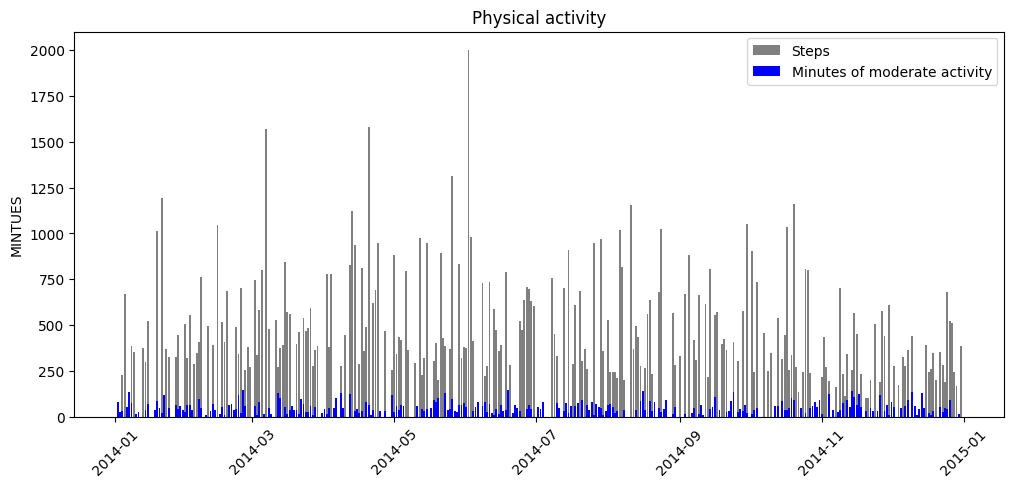

,step_count,minutes_moderate_activity
timestamp,,
2014-01-02 00:00:00+00:00,0.000000,81.916026
2014-01-03 00:00:00+00:00,0.000000,22.094257
2014-01-04 00:00:00+00:00,225.818338,29.356753
2014-01-05 00:00:00+00:00,669.190686,0.000000
2014-01-06 00:00:00+00:00,0.000000,54.582769
...,...,...
2014-12-27 00:00:00+00:00,510.889004,0.000000
2014-12-28 00:00:00+00:00,244.621928,0.000000
2014-12-29 00:00:00+00:00,164.269815,0.000000


In [87]:
# 6. Distance
# The distance is a merge of minutes_moderate_activity and step_count
# plot daily with bar

def extract_measure(data, schema_name, field_name):
    records = []
    for entry in data:
        try:
            if entry["header"]["schema_id"]["name"] != schema_name:
                continue
            tf = entry["body"]["effective_time_frame"]
            if "date_time" in tf:
                timestamp = tf["date_time"]
            elif "time_interval" in tf:
                timestamp = tf["time_interval"]["start_date_time"]
            else:
                continue

            value_raw = entry["body"].get(field_name)
            value = value_raw["value"] if isinstance(value_raw, dict) else value_raw

            records.append({
                "timestamp": datetime.fromisoformat(timestamp.replace("Z", "+00:00")),
                field_name: value
            })
        except Exception:
            continue

    df = pd.DataFrame(records)
    if not df.empty:
        df.set_index("timestamp", inplace=True)
        df = df.resample("D").sum()
    return df

# Extract both step count and moderate activity
df_steps = extract_measure(data, "step-count", "step_count")
df_minutes = extract_measure(data, "minutes-moderate-activity", "minutes_moderate_activity")

# Merge and fill empty with 0
df_combined = pd.concat([df_steps, df_minutes], axis=1).fillna(0)

# Plotting grouped bar chart
plt.figure(figsize=(12, 5))
plt.bar(df_combined.index, df_combined["step_count"], label="Steps", color="grey")
plt.bar(df_combined.index, df_combined["minutes_moderate_activity"], label="Minutes of moderate activity", color="blue")

plt.ylabel("MINTUES")
plt.title("Physical activity")
plt.xticks(rotation=45)
plt.legend()
plt.show()

display(df_combined)

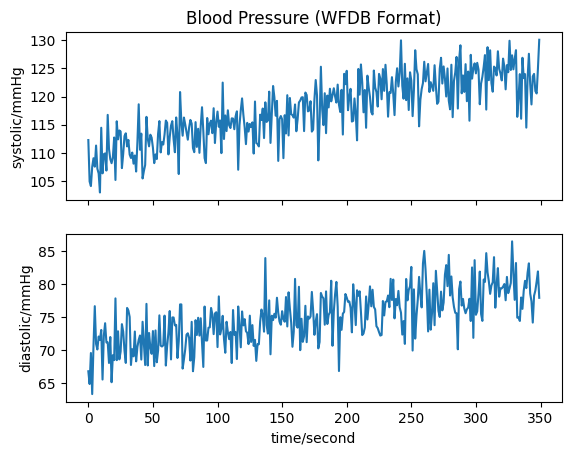

In [88]:
# Now we can convert the open mHealth data to wfdb format. 
# Since the Json dataset has converted to Python data. We can easily use the previous method.
# Now we will convert the blood-pressure and plot using wfdb.


import pandas as pd
import json
from datetime import datetime
import wfdb

# Load your JSON file
with open("1yr.json", "r") as file:
    data = json.load(file)

# Extract blood pressure records
records_bp = []
for entry in data:
    try:
        timestamp = entry["body"]["effective_time_frame"]["date_time"]
        systolic = entry["body"]["systolic_blood_pressure"]["value"]
        diastolic = entry["body"]["diastolic_blood_pressure"]["value"]
        records_bp.append({
            "timestamp": datetime.fromisoformat(timestamp.replace("Z", "+00:00")),
            "systolic": systolic,
            "diastolic": diastolic
        })
    except KeyError:
        continue

df_bp = pd.DataFrame(records_bp)
df_bp.sort_values("timestamp", inplace=True)
df_bp.reset_index(drop=True, inplace=True)

# Convert to WFDB format
sig_data = df_bp[["systolic", "diastolic"]].to_numpy()
comments = [f"timestamp: {ts.isoformat()}" for ts in df_bp["timestamp"]]

# Write WFDB record
wfdb.wrsamp(
    "bp_1yr",
    fs=1,
    units=["mmHg", "mmHg"],
    sig_name=["systolic", "diastolic"],
    p_signal=sig_data,
    comments=comments
)

# Plot WFDB record
record = wfdb.rdrecord("bp_1yr")
wfdb.plot_wfdb(record=record, title="Blood Pressure (WFDB Format)")

summary why not wfdb -> openmh
can be only imported from openmh



#### Limitations of Converting WFDB to Open mHealth

While it is technically possible to convert data from WFDB format to Open mHealth format, the process is often incomplete or lossy due to the data semantics of the two formats.

WFDB signals lack labels such as measurement context (effective_time_frame), data source (schema_id), or semantic meaning.

Also, WFDB does not typically include device or user metadata.

To force a conversion from WFDB to Open mHealth (OMH), we must inject synthetic or assumed metadata—such as schema_id, source_name, and device type—since WFDB does not inherently store this contextual information. 

**This means fabricating values that do not originally exist in the WFDB data**